<a href="https://colab.research.google.com/github/Satyamaadi/python/blob/master/practical_stats_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  import pandas as pd
  import numpy as np

In [3]:
df_1 = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv')

In [4]:
df_1.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [5]:
df_1['Population'].mean()

6162876.3

In [9]:
from scipy.stats import trim_mean
trim_mean(df_1['Population'],0.1)

4783697.125

In [10]:
df_1['Population'].median()

4436369.5

In [11]:
df_1['Murder.Rate'].mean()

4.066

In [13]:
np.average(df_1['Murder.Rate'],weights=df_1['Population'])

4.445833981123393

In [16]:
!pip install wquantiles

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import wquantiles

In [18]:
wquantiles.median(df_1['Murder.Rate'],weights=df_1['Population'])

4.4

Estimation of variation

In [19]:
df_1['Population'].std()

6848235.347401142

In [20]:
df_1['Population'].quantile(0.75) - df_1['Population'].quantile(0.25)

4847308.0

In [21]:
df_1['Population'].quantile([0.25,0.50,0.75])

0.25    1833004.25
0.50    4436369.50
0.75    6680312.25
Name: Population, dtype: float64

<Axes: >

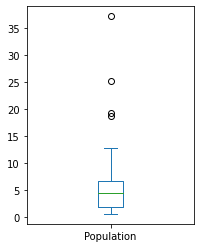

In [23]:
(df_1['Population']/1_000_000).plot.box(figsize=(3,4))

In [25]:
binn_pop = pd.cut(df_1['Population'],10)

In [27]:
binn_pop.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

<Axes: ylabel='Frequency'>

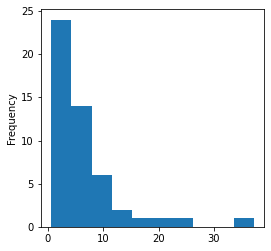

In [29]:
(df_1['Population'] / 1_000_000).plot.hist(figsize=(4, 4))

<Axes: ylabel='Density'>

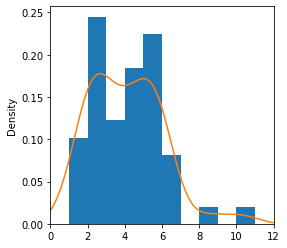

In [35]:
ax=df_1['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
df_1['Murder.Rate'].plot.density(ax=ax)

In [40]:
df_2 =  pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/dfw_airline.csv')

In [41]:
df_2.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

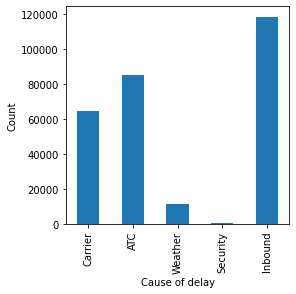

In [42]:
ax = df_2.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

In [43]:
sp_500 = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/sp500_sectors.csv')

In [44]:
sp_500.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [46]:
telecomSymbols = sp_500[sp_500['sector'] == 'telecommunications_services']['symbol']


In [47]:
telecomSymbols

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

In [54]:
sp_500_px = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/sp500_data.csv.gz',index_col=0)

In [55]:
sp_500_px

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.000000,0.060124,-0.022100,0.000000,0.000000,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.000000,0.000000,0.347160,0.000000,0.041670,0.000000,0.015564,1.750000,0.125000,0.000000
1993-02-01,0.000000,-0.180389,0.027621,0.000000,0.000000,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.000000,0.000000,-0.231440,0.000000,0.000000,-0.010410,0.007782,1.250000,0.125000,0.000000
1993-02-02,0.000000,-0.120257,0.035900,0.000000,0.000000,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.000000,0.000000,-0.115720,0.000000,0.000000,0.000000,-0.007792,-0.250000,0.000000,0.000000
1993-02-03,0.000000,0.060124,-0.024857,0.000000,0.000000,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.000000,0.000000,-0.086790,0.000000,0.041670,-0.041670,-0.038919,-0.500000,0.062500,0.000000
1993-02-04,0.000000,-0.360770,-0.060757,0.000000,0.000000,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.000000,0.000000,0.144650,0.000000,-0.041660,-0.031260,-0.046711,0.000000,0.062500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,0.019989,-0.529999,-0.379997,0.080002,0.350003,-0.580002,-0.457999,-1.720001,-0.009936,0.039997,...,-2.500000,1.889999,-2.060012,0.150002,-1.630004,-0.990005,-2.250000,1.270019,-1.919998,-0.080002
2015-06-26,-1.299988,-0.330000,-0.390004,-1.820000,0.190003,0.330002,-0.328565,-0.769989,0.020000,0.000000,...,-0.070007,-2.380005,-1.390000,0.550004,-3.509979,-1.080002,-0.800003,-1.900024,-3.629997,0.440002
2015-06-29,-10.299988,-0.410000,-0.670002,-1.250000,-1.919998,-0.510002,-0.139999,-0.949997,-0.100000,-0.040001,...,-2.250000,-5.490005,-5.029999,0.090000,-8.290009,-1.209999,-2.419998,-9.620026,-3.770004,-2.479996
2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.200000,0.020001,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001


In [56]:
telecom = sp_500_px.loc[sp_500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000
